# 1. Import and Install Dependencies

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [6]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
draw_landmarks(frame, results)

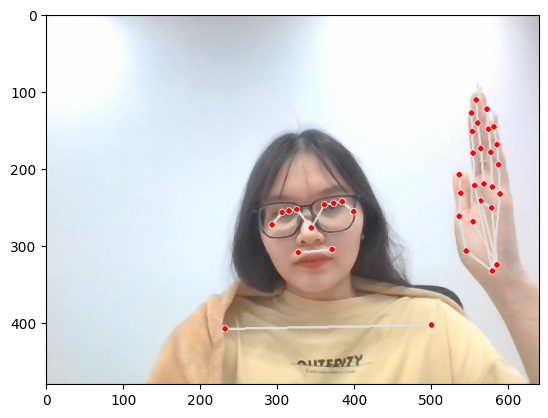

In [8]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [9]:
len(results.left_hand_landmarks.landmark)

21

In [10]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [11]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [12]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
#     if results.face_landmarks 
#     else np.zeros(1404)


In [13]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [14]:
result_test = extract_keypoints(results)

In [15]:
result_test

array([ 0.53837454,  0.57718539, -1.12284744, ...,  0.        ,
        0.        ,  0.        ])

In [16]:
np.save('0', result_test)

In [17]:
np.load('0.npy')

array([ 0.53837454,  0.57718539, -1.12284744, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [18]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 
print(DATA_PATH)

# Actions that we try to detect
actions = np.array(['handsUp', 'ok', 'sayHi'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

MP_Data


In [19]:
for action in actions: 
#     dirmax = np.max(np.array(os.listdir("MP_Data/handsup")).astype(int))
    for sequence in range(1,no_sequences+1):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [20]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(frame_num ))
                print(npy_path, keypoints)
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

MP_Data\handsUp\0 [ 0.55306894  0.58851135 -1.20635676 ...  0.          0.
  0.        ]
MP_Data\handsUp\1 [ 0.55278122  0.59031397 -1.05186188 ...  0.          0.
  0.        ]
MP_Data\handsUp\2 [ 0.55266804  0.59241199 -0.99899226 ...  0.          0.
  0.        ]
MP_Data\handsUp\3 [ 0.55254841  0.59436101 -0.97022742 ...  0.          0.
  0.        ]
MP_Data\handsUp\4 [ 0.55226171  0.59621799 -0.93195879 ...  0.          0.
  0.        ]
MP_Data\handsUp\5 [ 0.55186474  0.59611523 -0.9810726  ...  0.          0.
  0.        ]
MP_Data\handsUp\6 [ 0.55166566  0.5957185  -0.91871417 ...  0.          0.
  0.        ]
MP_Data\handsUp\7 [ 0.54520214  0.59565651 -0.92171365 ...  0.          0.
  0.        ]
MP_Data\handsUp\8 [ 0.54245758  0.59563422 -0.92746621 ...  0.          0.
  0.        ]
MP_Data\handsUp\9 [ 0.54114664  0.5958007  -0.87316781 ...  0.          0.
  0.        ]
MP_Data\handsUp\10 [ 0.54043019  0.59580362 -0.87204313 ...  0.          0.
  0.        ]
MP_Data\handsUp\11 [

MP_Data\handsUp\3 [ 0.534073    0.59181076 -1.03353667 ...  0.          0.
  0.        ]
MP_Data\handsUp\4 [ 0.53459811  0.59125453 -1.49765909 ...  0.          0.
  0.        ]
MP_Data\handsUp\5 [ 0.53529942  0.59233892 -1.26177227 ...  0.          0.
  0.        ]
MP_Data\handsUp\6 [ 0.53550828  0.59233552 -1.24595022 ...  0.          0.
  0.        ]
MP_Data\handsUp\7 [ 0.53636408  0.59221691 -1.29493225 ...  0.          0.
  0.        ]
MP_Data\handsUp\8 [ 0.53743613  0.5921154  -1.31949401 ...  0.          0.
  0.        ]
MP_Data\handsUp\9 [ 0.53778887  0.59212118 -1.32727206 ...  0.          0.
  0.        ]
MP_Data\handsUp\10 [ 0.53846496  0.58952737 -1.29823124 ...  0.          0.
  0.        ]
MP_Data\handsUp\11 [ 0.53822225  0.58945793 -1.32649565 ...  0.          0.
  0.        ]
MP_Data\handsUp\12 [ 0.53817177  0.58942169 -1.38035035 ...  0.          0.
  0.        ]
MP_Data\handsUp\13 [ 0.53777051  0.58973533 -1.39577281 ...  0.          0.
  0.        ]
MP_Data\handsUp\1

MP_Data\handsUp\3 [ 0.56764942  0.5814867  -0.97212219 ...  0.26920921  0.39054799
 -0.0386342 ]
MP_Data\handsUp\4 [ 0.56772721  0.58202147 -1.04399359 ...  0.27084234  0.44229972
 -0.02283513]
MP_Data\handsUp\5 [ 0.56877369  0.58215934 -1.08437943 ...  0.23464739  0.82689601
 -0.02550382]
MP_Data\handsUp\6 [ 0.57125175  0.5824337  -1.44725919 ...  0.          0.
  0.        ]
MP_Data\handsUp\7 [ 0.5713225   0.58245009 -1.48806822 ...  0.          0.
  0.        ]
MP_Data\handsUp\8 [ 0.57146388  0.58317375 -1.47119296 ...  0.          0.
  0.        ]
MP_Data\handsUp\9 [ 0.57195556  0.58304006 -1.52265573 ...  0.          0.
  0.        ]
MP_Data\handsUp\10 [ 0.57208383  0.58371407 -1.51073945 ...  0.          0.
  0.        ]
MP_Data\handsUp\11 [ 0.57222813  0.58349383 -1.59313619 ...  0.          0.
  0.        ]
MP_Data\handsUp\12 [ 0.57293016  0.58349538 -1.48152947 ...  0.          0.
  0.        ]
MP_Data\handsUp\13 [ 0.57392192  0.58340204 -1.48754871 ...  0.          0.
  0.   

MP_Data\handsUp\2 [ 0.5612005   0.57544672 -0.89394915 ...  0.30642     0.42520732
 -0.02455395]
MP_Data\handsUp\3 [ 0.56223035  0.57592988 -1.06554317 ...  0.2669861   0.60337687
 -0.02591139]
MP_Data\handsUp\4 [ 0.56341296  0.57693225 -1.11732697 ...  0.26887116  0.66657633
 -0.02114425]
MP_Data\handsUp\5 [ 0.56718695  0.57708013 -1.34142518 ...  0.          0.
  0.        ]
MP_Data\handsUp\6 [ 0.56722093  0.57708114 -1.16508865 ...  0.          0.
  0.        ]
MP_Data\handsUp\7 [ 0.56750947  0.57725513 -1.18574357 ...  0.          0.
  0.        ]
MP_Data\handsUp\8 [ 0.56562197  0.57880574 -1.21097231 ...  0.          0.
  0.        ]
MP_Data\handsUp\9 [ 0.56495738  0.57904232 -1.22934186 ...  0.          0.
  0.        ]
MP_Data\handsUp\10 [ 0.56502068  0.57888836 -1.28916931 ...  0.          0.
  0.        ]
MP_Data\handsUp\11 [ 0.56496966  0.57874948 -1.21349299 ...  0.          0.
  0.        ]
MP_Data\handsUp\12 [ 0.56519938  0.57768005 -1.19095981 ...  0.          0.
  0.    

MP_Data\handsUp\27 [ 0.56649268  0.5766167  -1.11170924 ...  0.10867374  0.3826158
 -0.02608182]
MP_Data\handsUp\28 [ 0.56626862  0.57662231 -1.1139468  ...  0.11064204  0.38074946
 -0.02577825]
MP_Data\handsUp\29 [ 0.56616127  0.5766201  -1.15117335 ...  0.11053073  0.3837775
 -0.02648951]
MP_Data\handsUp\0 [ 0.56610715  0.57670975 -1.14799404 ...  0.11004376  0.38414949
 -0.02529804]
MP_Data\handsUp\1 [ 0.5659405   0.57657254 -1.11228144 ...  0.10623739  0.40769356
 -0.02242284]
MP_Data\handsUp\2 [ 0.56485564  0.57556778 -0.93894273 ...  0.03127564  0.5643062
 -0.01142427]
MP_Data\handsUp\3 [ 0.56288308  0.57491308 -0.91462803 ...  0.01224891  0.71755588
  0.00748009]
MP_Data\handsUp\4 [ 0.56000167  0.57508188 -1.27178764 ...  0.          0.
  0.        ]
MP_Data\handsUp\5 [ 0.55945164  0.57578218 -0.90212518 ...  0.          0.
  0.        ]
MP_Data\handsUp\6 [ 0.55942351  0.57624948 -0.94828737 ...  0.          0.
  0.        ]
MP_Data\handsUp\7 [ 0.55771679  0.5771504  -0.95494682

MP_Data\handsUp\29 [ 0.54355663  0.57843196 -1.00961244 ...  0.          0.
  0.        ]
MP_Data\handsUp\0 [ 0.54354525  0.57802695 -1.01055288 ...  0.          0.
  0.        ]
MP_Data\handsUp\1 [ 0.54280186  0.57757056 -1.06465507 ...  0.          0.
  0.        ]
MP_Data\handsUp\2 [ 0.54261339  0.57734323 -1.06047225 ...  0.          0.
  0.        ]
MP_Data\handsUp\3 [ 0.54247051  0.57696712 -1.05719471 ...  0.          0.
  0.        ]
MP_Data\handsUp\4 [ 0.54237086  0.57652187 -1.05435586 ...  0.          0.
  0.        ]
MP_Data\handsUp\5 [ 0.54235393  0.57650763 -0.98572475 ...  0.          0.
  0.        ]
MP_Data\handsUp\6 [ 0.54198891  0.57743794 -1.28103328 ...  0.          0.
  0.        ]
MP_Data\handsUp\7 [ 0.53974652  0.57742792 -1.34583342 ...  0.          0.
  0.        ]
MP_Data\handsUp\8 [ 0.53856373  0.57762092 -1.45504105 ...  0.          0.
  0.        ]
MP_Data\handsUp\9 [ 0.53823853  0.57739896 -1.35289037 ...  0.          0.
  0.        ]
MP_Data\handsUp\10 [

MP_Data\handsUp\27 [ 0.57890809  0.58007818 -0.89178973 ...  0.31952703  0.35120893
 -0.03998908]
MP_Data\handsUp\28 [ 0.57894564  0.58010828 -0.84437352 ...  0.3192597   0.35082468
 -0.039825  ]
MP_Data\handsUp\29 [ 0.57894099  0.58009297 -0.82976544 ...  0.3199189   0.35151982
 -0.03962972]
MP_Data\handsUp\0 [ 0.57895911  0.58016187 -0.83767927 ...  0.31837487  0.3496545
 -0.03965651]
MP_Data\handsUp\1 [ 0.57892585  0.58016336 -0.87873298 ...  0.32367188  0.3529205
 -0.04033879]
MP_Data\handsUp\2 [ 0.57873803  0.58016908 -0.89115    ...  0.3119722   0.32023594
 -0.03126885]
MP_Data\handsUp\3 [ 0.57896245  0.58020383 -0.98229855 ...  0.31159663  0.237129
 -0.01477874]
MP_Data\handsUp\4 [ 0.57922137  0.58079022 -0.97612363 ...  0.31410283  0.2176713
 -0.01427665]
MP_Data\handsUp\5 [ 0.5793736   0.58129084 -1.03745818 ...  0.31943139  0.17246898
 -0.01326391]
MP_Data\handsUp\6 [ 0.57943648  0.58181804 -1.05540872 ...  0.32182625  0.18461449
 -0.013299  ]
MP_Data\handsUp\7 [ 0.57960784  

MP_Data\handsUp\24 [ 0.57958472  0.58592123 -0.98686904 ...  0.24793699  0.22083677
 -0.04423747]
MP_Data\handsUp\25 [ 0.58000392  0.58603096 -0.99103624 ...  0.25022948  0.22067155
 -0.04272284]
MP_Data\handsUp\26 [ 0.5801369   0.58605158 -1.04277647 ...  0.24844287  0.22015096
 -0.04470784]
MP_Data\handsUp\27 [ 0.5803706   0.58601469 -1.03324997 ...  0.24783553  0.22358848
 -0.0420306 ]
MP_Data\handsUp\28 [ 0.58062243  0.58549494 -1.00143123 ...  0.24886285  0.21808581
 -0.04305819]
MP_Data\handsUp\29 [ 0.58074868  0.58492362 -0.91181183 ...  0.24922076  0.22160022
 -0.04210051]
MP_Data\handsUp\0 [ 0.58085823  0.58483261 -0.93169993 ...  0.24959774  0.22044989
 -0.04286414]
MP_Data\handsUp\1 [ 0.58110607  0.58446676 -1.03321087 ...  0.25310665  0.22819747
 -0.03592099]
MP_Data\handsUp\2 [ 0.58116674  0.58431023 -1.10715985 ...  0.23867162  0.41376862
 -0.03264677]
MP_Data\handsUp\3 [ 0.58315396  0.5843522  -1.08798909 ...  0.2091842   0.77854282
 -0.02598053]
MP_Data\handsUp\4 [ 0.58

MP_Data\handsUp\22 [ 0.56762874  0.574974   -1.0171181  ...  0.          0.
  0.        ]
MP_Data\handsUp\23 [ 0.56673372  0.57532704 -1.01953852 ...  0.          0.
  0.        ]
MP_Data\handsUp\24 [ 0.56609935  0.57584518 -0.97197592 ...  0.          0.
  0.        ]
MP_Data\handsUp\25 [ 0.56613553  0.57528472 -0.90817738 ...  0.          0.
  0.        ]
MP_Data\handsUp\26 [ 0.56476068  0.57634979 -0.94458371 ...  0.          0.
  0.        ]
MP_Data\handsUp\27 [ 0.56413174  0.57642639 -0.95208091 ...  0.          0.
  0.        ]
MP_Data\handsUp\28 [ 0.56233776  0.57683128 -0.94073403 ...  0.          0.
  0.        ]
MP_Data\handsUp\29 [ 0.5614531   0.57723624 -0.94387567 ...  0.          0.
  0.        ]
MP_Data\handsUp\0 [ 0.56088865  0.57791317 -0.94346017 ...  0.          0.
  0.        ]
MP_Data\handsUp\1 [ 0.56089908  0.57777506 -0.94178182 ...  0.          0.
  0.        ]
MP_Data\handsUp\2 [ 0.56091756  0.5774492  -0.90254653 ...  0.          0.
  0.        ]
MP_Data\hands

MP_Data\handsUp\26 [ 0.545883    0.57543957 -0.91330433 ...  0.          0.
  0.        ]
MP_Data\handsUp\27 [ 0.54534316  0.57616991 -0.91942394 ...  0.          0.
  0.        ]
MP_Data\handsUp\28 [ 0.54506236  0.57653105 -0.92233211 ...  0.          0.
  0.        ]
MP_Data\handsUp\29 [ 0.5450052   0.57699096 -0.92487258 ...  0.          0.
  0.        ]
MP_Data\handsUp\0 [ 0.54494298  0.57701409 -0.98563892 ...  0.          0.
  0.        ]
MP_Data\handsUp\1 [ 0.5445984   0.57700276 -0.97807962 ...  0.          0.
  0.        ]
MP_Data\handsUp\2 [ 0.54429966  0.57739806 -0.99784642 ...  0.          0.
  0.        ]
MP_Data\handsUp\3 [ 0.54423434  0.57765096 -0.99611968 ...  0.          0.
  0.        ]
MP_Data\handsUp\4 [ 0.54401982  0.57863927 -0.99410069 ...  0.          0.
  0.        ]
MP_Data\handsUp\5 [ 0.54403287  0.57883525 -0.96208489 ...  0.          0.
  0.        ]
MP_Data\handsUp\6 [ 0.54402244  0.5789386  -0.90456372 ...  0.          0.
  0.        ]
MP_Data\handsUp\7

MP_Data\handsUp\29 [ 0.55094087  0.58294839 -1.01938701 ...  0.          0.
  0.        ]
MP_Data\ok\0 [ 0.55104995  0.58268821 -0.99916947 ...  0.          0.
  0.        ]
MP_Data\ok\1 [ 0.55111903  0.5825389  -1.00666487 ...  0.          0.
  0.        ]
MP_Data\ok\2 [ 0.55141449  0.58198911 -0.99844551 ...  0.          0.
  0.        ]
MP_Data\ok\3 [ 0.55144322  0.58142453 -0.99953967 ...  0.          0.
  0.        ]
MP_Data\ok\4 [ 0.55090553  0.58061588 -0.95519859 ...  0.          0.
  0.        ]
MP_Data\ok\5 [ 0.55011213  0.58038104 -0.93917227 ...  0.          0.
  0.        ]
MP_Data\ok\6 [ 0.5495674   0.5803355  -0.93723285 ...  0.          0.
  0.        ]
MP_Data\ok\7 [ 0.54802024  0.57988679 -0.93235874 ...  0.          0.
  0.        ]
MP_Data\ok\8 [ 0.54790151  0.57984728 -0.96125776 ...  0.          0.
  0.        ]
MP_Data\ok\9 [ 0.54731053  0.57981759 -1.29184556 ...  0.          0.
  0.        ]
MP_Data\ok\10 [ 0.54698479  0.57870418 -1.44231033 ...  0.          0.

MP_Data\ok\6 [ 0.56293547  0.56290317 -0.76707697 ...  0.          0.
  0.        ]
MP_Data\ok\7 [ 0.56253338  0.56279951 -0.75407529 ...  0.          0.
  0.        ]
MP_Data\ok\8 [ 0.56229657  0.56272686 -0.8005864  ...  0.          0.
  0.        ]
MP_Data\ok\9 [ 0.56215537  0.56260812 -0.79130208 ...  0.          0.
  0.        ]
MP_Data\ok\10 [ 0.56204897  0.56227279 -0.77459061 ...  0.          0.
  0.        ]
MP_Data\ok\11 [ 0.56165802  0.56173098 -0.72436821 ...  0.          0.
  0.        ]
MP_Data\ok\12 [ 0.56152838  0.56168729 -0.77455735 ...  0.          0.
  0.        ]
MP_Data\ok\13 [ 0.56139934  0.56168294 -0.74431437 ...  0.          0.
  0.        ]
MP_Data\ok\14 [ 0.56137097  0.56165129 -0.77324545 ...  0.          0.
  0.        ]
MP_Data\ok\15 [ 0.5611608   0.56137866 -0.79947782 ...  0.          0.
  0.        ]
MP_Data\ok\16 [ 0.56093347  0.56205463 -0.8377775  ...  0.          0.
  0.        ]
MP_Data\ok\17 [ 0.56090438  0.56204957 -0.79558343 ...  0.          0

MP_Data\ok\14 [ 0.60078669  0.55910057 -1.09265411 ...  0.38433856  0.25455451
 -0.04968938]
MP_Data\ok\15 [ 0.60030705  0.55932432 -1.12249947 ...  0.38479993  0.2514784
 -0.05094169]
MP_Data\ok\16 [ 0.59997416  0.55994344 -1.12471926 ...  0.39137754  0.24720795
 -0.045811  ]
MP_Data\ok\17 [ 0.59920418  0.55985105 -1.10063195 ...  0.38994327  0.24754338
 -0.04853905]
MP_Data\ok\18 [ 0.59839261  0.55943656 -1.0954206  ...  0.3883884   0.24835156
 -0.04859111]
MP_Data\ok\19 [ 0.59743154  0.55920249 -1.09754777 ...  0.38897663  0.25026828
 -0.04863788]
MP_Data\ok\20 [ 0.59670508  0.55905664 -1.11276519 ...  0.3887454   0.24895971
 -0.04785285]
MP_Data\ok\21 [ 0.59620345  0.55894607 -1.14307666 ...  0.38737035  0.24786808
 -0.04687887]
MP_Data\ok\22 [ 0.595985    0.55890179 -1.17026591 ...  0.38650662  0.24812895
 -0.04694089]
MP_Data\ok\23 [ 0.5955773   0.55881143 -1.15653706 ...  0.3865442   0.24920286
 -0.04757956]
MP_Data\ok\24 [ 0.5948025   0.55813271 -1.14229989 ...  0.38484991  0.2

MP_Data\ok\14 [ 0.57918328  0.57032049 -1.31595576 ...  0.29441828  0.10960385
 -0.05208778]
MP_Data\ok\15 [ 0.57899028  0.57032317 -1.39216709 ...  0.29639983  0.11136402
 -0.04556772]
MP_Data\ok\16 [ 0.57872397  0.56982523 -1.40834475 ...  0.29413995  0.11067426
 -0.04816915]
MP_Data\ok\17 [ 0.57868648  0.56979251 -1.40429819 ...  0.29432344  0.11029777
 -0.0484863 ]
MP_Data\ok\18 [ 0.57830071  0.56976765 -1.45896971 ...  0.29535347  0.11136286
 -0.04730241]
MP_Data\ok\19 [ 0.57789552  0.5698036  -1.53471255 ...  0.2954033   0.11159356
 -0.04784532]
MP_Data\ok\20 [ 0.57773668  0.56983548 -1.49096406 ...  0.29519308  0.11159776
 -0.04831029]
MP_Data\ok\21 [ 0.57771659  0.56983262 -1.48252046 ...  0.29086545  0.11683735
 -0.04881918]
MP_Data\ok\22 [ 0.5776785   0.56983763 -1.48218858 ...  0.28804901  0.11762537
 -0.0485943 ]
MP_Data\ok\23 [ 0.57765889  0.56983554 -1.4813695  ...  0.2906175   0.11725152
 -0.04547557]
MP_Data\ok\24 [ 0.5776509   0.56980187 -1.49027646 ...  0.2903955   0.

MP_Data\ok\15 [ 0.58288091  0.57205135 -1.19343531 ...  0.12190597  0.28383842
 -0.0467115 ]
MP_Data\ok\16 [ 0.58290893  0.57205451 -1.19091201 ...  0.12383033  0.28286982
 -0.04541333]
MP_Data\ok\17 [ 0.58290642  0.57195532 -1.18036115 ...  0.12295855  0.28324324
 -0.04557917]
MP_Data\ok\18 [ 0.58266437  0.57195514 -1.13894379 ...  0.12032005  0.28518188
 -0.04810339]
MP_Data\ok\19 [ 0.58266896  0.57182652 -1.21264672 ...  0.12328999  0.2848621
 -0.04573519]
MP_Data\ok\20 [ 0.58269352  0.57182288 -1.20655334 ...  0.12223849  0.28539097
 -0.04477456]
MP_Data\ok\21 [ 0.58278877  0.57182515 -1.1504122  ...  0.12093369  0.28715923
 -0.04728564]
MP_Data\ok\22 [ 0.58281863  0.57190824 -1.15059555 ...  0.12210615  0.28568023
 -0.04581199]
MP_Data\ok\23 [ 0.58292329  0.57204872 -1.14897954 ...  0.12398902  0.28562444
 -0.04562248]
MP_Data\ok\24 [ 0.58298874  0.5720647  -1.14437962 ...  0.1211651   0.2865088
 -0.04876453]
MP_Data\ok\25 [ 0.58303535  0.57212609 -1.06127334 ...  0.12210923  0.28

MP_Data\ok\15 [ 0.57037711  0.57346916 -1.15762162 ...  0.          0.
  0.        ]
MP_Data\ok\16 [ 0.57008326  0.57531166 -1.1910727  ...  0.          0.
  0.        ]
MP_Data\ok\17 [ 0.57002729  0.57648176 -1.16444325 ...  0.          0.
  0.        ]
MP_Data\ok\18 [ 0.57322705  0.5711664  -0.93725073 ...  0.          0.
  0.        ]
MP_Data\ok\19 [ 0.57718033  0.56966704 -0.85275584 ...  0.          0.
  0.        ]
MP_Data\ok\20 [ 0.57891119  0.56922638 -0.87975234 ...  0.          0.
  0.        ]
MP_Data\ok\21 [ 0.57876849  0.56611115 -0.8674553  ...  0.          0.
  0.        ]
MP_Data\ok\22 [ 0.5802722   0.56510788 -0.89825714 ...  0.          0.
  0.        ]
MP_Data\ok\23 [ 0.58104509  0.56379318 -0.91040146 ...  0.          0.
  0.        ]
MP_Data\ok\24 [ 0.58086699  0.55955285 -1.04715145 ...  0.          0.
  0.        ]
MP_Data\ok\25 [ 0.58005393  0.55849165 -1.08808136 ...  0.          0.
  0.        ]
MP_Data\ok\26 [ 0.57893908  0.55432373 -1.06564319 ...  0.       

MP_Data\ok\23 [ 0.56540883  0.56063968 -1.07767606 ...  0.          0.
  0.        ]
MP_Data\ok\24 [ 0.56528383  0.5605526  -1.06517589 ...  0.          0.
  0.        ]
MP_Data\ok\25 [ 0.56502342  0.56100333 -1.12867868 ...  0.          0.
  0.        ]
MP_Data\ok\26 [ 0.56466562  0.56153524 -1.13199329 ...  0.          0.
  0.        ]
MP_Data\ok\27 [ 0.56464487  0.56145793 -1.11917329 ...  0.          0.
  0.        ]
MP_Data\ok\28 [ 0.56463647  0.56165755 -1.12098384 ...  0.          0.
  0.        ]
MP_Data\ok\29 [ 0.56458986  0.56194866 -1.11835384 ...  0.          0.
  0.        ]
MP_Data\ok\0 [ 0.56458014  0.56246114 -1.11340129 ...  0.          0.
  0.        ]
MP_Data\ok\1 [ 0.56463063  0.56223589 -1.19032979 ...  0.          0.
  0.        ]
MP_Data\ok\2 [ 0.56553888  0.56150109 -1.15895188 ...  0.          0.
  0.        ]
MP_Data\ok\3 [ 0.56661737  0.56207526 -1.21356571 ...  0.          0.
  0.        ]
MP_Data\ok\4 [ 0.56684762  0.56259841 -1.27406728 ...  0.          0.

MP_Data\ok\0 [ 0.57447129  0.57481229 -1.10782146 ...  0.          0.
  0.        ]
MP_Data\ok\1 [ 0.57305795  0.57469469 -1.11396039 ...  0.          0.
  0.        ]
MP_Data\ok\2 [ 0.5724842   0.57202095 -1.01373935 ...  0.          0.
  0.        ]
MP_Data\ok\3 [ 0.571953    0.57071769 -0.99385768 ...  0.          0.
  0.        ]
MP_Data\ok\4 [ 0.57131517  0.57050115 -1.02650702 ...  0.          0.
  0.        ]
MP_Data\ok\5 [ 0.57123482  0.57038879 -0.98945582 ...  0.          0.
  0.        ]
MP_Data\ok\6 [ 0.57121223  0.57059103 -1.00750363 ...  0.          0.
  0.        ]
MP_Data\ok\7 [ 0.57112956  0.5706116  -1.00733185 ...  0.          0.
  0.        ]
MP_Data\ok\8 [ 0.57116634  0.57078838 -1.01880527 ...  0.          0.
  0.        ]
MP_Data\ok\9 [ 0.57122666  0.57079381 -1.00225449 ...  0.          0.
  0.        ]
MP_Data\ok\10 [ 0.57062745  0.57073969 -1.00997484 ...  0.          0.
  0.        ]
MP_Data\ok\11 [ 0.57025158  0.57107919 -1.01456094 ...  0.          0.
  0.

MP_Data\ok\8 [ 0.57198828  0.57012671 -0.95246589 ...  0.          0.
  0.        ]
MP_Data\ok\9 [ 0.57186639  0.57018697 -0.97111785 ...  0.          0.
  0.        ]
MP_Data\ok\10 [ 0.57186049  0.57010919 -0.96708888 ...  0.          0.
  0.        ]
MP_Data\ok\11 [ 0.57183516  0.56966031 -0.96298236 ...  0.          0.
  0.        ]
MP_Data\ok\12 [ 0.57182419  0.56944847 -0.9682973  ...  0.          0.
  0.        ]
MP_Data\ok\13 [ 0.57155448  0.56794202 -1.01679111 ...  0.          0.
  0.        ]
MP_Data\ok\14 [ 0.57161474  0.56397069 -1.10254264 ...  0.          0.
  0.        ]
MP_Data\ok\15 [ 0.57160968  0.56393534 -1.07758534 ...  0.          0.
  0.        ]
MP_Data\ok\16 [ 0.57142538  0.56432521 -1.0632565  ...  0.          0.
  0.        ]
MP_Data\ok\17 [ 0.57142597  0.56576312 -1.06090534 ...  0.          0.
  0.        ]
MP_Data\ok\18 [ 0.57141316  0.56589168 -1.08177006 ...  0.          0.
  0.        ]
MP_Data\ok\19 [ 0.57137036  0.56699425 -1.10826194 ...  0.         

MP_Data\ok\15 [ 0.56990588  0.55783325 -1.00292361 ...  0.          0.
  0.        ]
MP_Data\ok\16 [ 0.57001197  0.55772024 -0.99093276 ...  0.          0.
  0.        ]
MP_Data\ok\17 [ 0.57001323  0.55764234 -0.9848035  ...  0.          0.
  0.        ]
MP_Data\ok\18 [ 0.56980681  0.55763686 -1.09775043 ...  0.          0.
  0.        ]
MP_Data\ok\19 [ 0.56914592  0.55736554 -1.08506072 ...  0.          0.
  0.        ]
MP_Data\ok\20 [ 0.56870472  0.55656272 -0.93908358 ...  0.          0.
  0.        ]
MP_Data\ok\21 [ 0.56855786  0.55642116 -0.95435011 ...  0.          0.
  0.        ]
MP_Data\ok\22 [ 0.56857359  0.55685544 -0.94320136 ...  0.          0.
  0.        ]
MP_Data\ok\23 [ 0.56840259  0.55703884 -0.9452399  ...  0.          0.
  0.        ]
MP_Data\ok\24 [ 0.56842834  0.55678374 -0.89513761 ...  0.          0.
  0.        ]
MP_Data\ok\25 [ 0.56842035  0.55670077 -0.94664097 ...  0.          0.
  0.        ]
MP_Data\ok\26 [ 0.56845891  0.55630386 -0.93833941 ...  0.       

MP_Data\sayHi\21 [ 0.56779939  0.56916332 -1.15529752 ...  0.          0.
  0.        ]
MP_Data\sayHi\22 [ 0.56763244  0.57001108 -1.40359819 ...  0.          0.
  0.        ]
MP_Data\sayHi\23 [ 0.56757396  0.57036108 -1.47429252 ...  0.          0.
  0.        ]
MP_Data\sayHi\24 [ 0.566903    0.57081962 -1.48645854 ...  0.          0.
  0.        ]
MP_Data\sayHi\25 [ 0.56594855  0.57177818 -1.45795751 ...  0.          0.
  0.        ]
MP_Data\sayHi\26 [ 0.5657981   0.57242191 -1.3541038  ...  0.          0.
  0.        ]
MP_Data\sayHi\27 [ 0.56692368  0.57599807 -1.31862128 ...  0.          0.
  0.        ]
MP_Data\sayHi\28 [ 0.56777877  0.5761649  -1.24947011 ...  0.          0.
  0.        ]
MP_Data\sayHi\29 [ 0.56776565  0.57615054 -1.10219932 ...  0.          0.
  0.        ]
MP_Data\sayHi\0 [ 0.56691444  0.57667422 -1.10664797 ...  0.          0.
  0.        ]
MP_Data\sayHi\1 [ 0.56576264  0.57691133 -1.06179428 ...  0.          0.
  0.        ]
MP_Data\sayHi\2 [ 0.56474465  0.57

MP_Data\sayHi\27 [ 0.5587132   0.57954031 -0.89623863 ...  0.          0.
  0.        ]
MP_Data\sayHi\28 [ 0.55706155  0.5795365  -1.05744934 ...  0.          0.
  0.        ]
MP_Data\sayHi\29 [ 0.5566833   0.57778269 -1.04741263 ...  0.          0.
  0.        ]
MP_Data\sayHi\0 [ 0.55660212  0.57554001 -1.04167283 ...  0.          0.
  0.        ]
MP_Data\sayHi\1 [ 0.55641222  0.57505256 -1.05542719 ...  0.          0.
  0.        ]
MP_Data\sayHi\2 [ 0.55638683  0.57314533 -1.15427804 ...  0.          0.
  0.        ]
MP_Data\sayHi\3 [ 0.55639666  0.57219762 -0.9821288  ...  0.          0.
  0.        ]
MP_Data\sayHi\4 [ 0.55687022  0.57107008 -0.86695969 ...  0.          0.
  0.        ]
MP_Data\sayHi\5 [ 0.55721861  0.56963712 -0.8740505  ...  0.          0.
  0.        ]
MP_Data\sayHi\6 [ 0.55763519  0.56958067 -0.943995   ...  0.          0.
  0.        ]
MP_Data\sayHi\7 [ 0.55829889  0.56942642 -0.96130192 ...  0.          0.
  0.        ]
MP_Data\sayHi\8 [ 0.55840778  0.56936538

MP_Data\sayHi\28 [ 0.57749259  0.5680564  -0.7254504  ...  0.4664892   0.54449838
 -0.04279541]
MP_Data\sayHi\29 [ 0.57768035  0.56803668 -0.72955263 ...  0.47031197  0.54101568
 -0.03092131]
MP_Data\sayHi\0 [ 0.57754576  0.56810224 -0.66603667 ...  0.46768638  0.5481168
 -0.04774842]
MP_Data\sayHi\1 [ 0.57708573  0.56810749 -0.77392358 ...  0.46125185  0.54483384
 -0.03342436]
MP_Data\sayHi\2 [ 0.57624418  0.56774145 -0.78684914 ...  0.46489793  0.54686624
 -0.04537723]
MP_Data\sayHi\3 [ 0.57578969  0.56758022 -0.79661667 ...  0.46355268  0.54749274
 -0.04926672]
MP_Data\sayHi\4 [ 0.57481003  0.56680894 -0.79164946 ...  0.46471152  0.54483199
 -0.04605496]
MP_Data\sayHi\5 [ 0.5745191   0.56628078 -0.7697717  ...  0.4639287   0.5454579
 -0.02339738]
MP_Data\sayHi\6 [ 0.57431448  0.56613702 -0.7596482  ...  0.46389687  0.54618335
 -0.04943773]
MP_Data\sayHi\7 [ 0.57427502  0.56627738 -0.71566594 ...  0.46513981  0.54777724
 -0.04432121]
MP_Data\sayHi\8 [ 0.5734387   0.56626534 -0.710595

MP_Data\sayHi\24 [ 0.5796181   0.55038238 -0.73375452 ...  0.45155996  0.56271654
 -0.06612463]
MP_Data\sayHi\25 [ 0.57964432  0.5504216  -0.75423539 ...  0.44657761  0.56387621
 -0.06233906]
MP_Data\sayHi\26 [ 0.57963246  0.55140918 -0.75343359 ...  0.44996634  0.56740856
 -0.06786621]
MP_Data\sayHi\27 [ 0.57965535  0.55144191 -0.73557907 ...  0.44546133  0.56856489
 -0.06831358]
MP_Data\sayHi\28 [ 0.57984364  0.55151808 -0.71664816 ...  0.44963732  0.56534773
 -0.06964232]
MP_Data\sayHi\29 [ 0.57985985  0.55306011 -0.69993562 ...  0.4456597   0.56220782
 -0.05979925]
MP_Data\sayHi\0 [ 0.57963675  0.55407017 -0.72498435 ...  0.44540229  0.56293827
 -0.06254346]
MP_Data\sayHi\1 [ 0.57946622  0.55410582 -0.72463465 ...  0.44851473  0.55840707
 -0.06130067]
MP_Data\sayHi\2 [ 0.57913744  0.55465961 -0.72795248 ...  0.44580913  0.55951387
 -0.05871782]
MP_Data\sayHi\3 [ 0.57931679  0.55604082 -0.75732225 ...  0.44760835  0.55700284
 -0.06033326]
MP_Data\sayHi\4 [ 0.58023179  0.55825967 -0.

MP_Data\sayHi\20 [ 0.55505073  0.58775449 -1.1581943  ...  0.43933731  0.82357484
 -0.06045253]
MP_Data\sayHi\21 [ 0.55361688  0.58736122 -1.09562624 ...  0.4357321   0.81724364
 -0.05998723]
MP_Data\sayHi\22 [ 0.55378139  0.5865289  -0.97308683 ...  0.39018407  0.751046
 -0.05088908]
MP_Data\sayHi\23 [ 0.55392355  0.58779043 -1.1281116  ...  0.33013168  0.64780432
 -0.04737614]
MP_Data\sayHi\24 [ 0.55420989  0.58777279 -1.18142378 ...  0.2745727   0.604918
 -0.06201335]
MP_Data\sayHi\25 [ 0.55686605  0.58890003 -1.27275538 ...  0.2602765   0.62777501
 -0.05972125]
MP_Data\sayHi\26 [ 0.55748034  0.58854425 -1.28867304 ...  0.25739998  0.6393925
 -0.0688854 ]
MP_Data\sayHi\27 [ 0.55823046  0.58734828 -1.3055352  ...  0.25326779  0.63533878
 -0.07295013]
MP_Data\sayHi\28 [ 0.55937898  0.58455598 -1.34623265 ...  0.25673711  0.63511944
 -0.07190619]
MP_Data\sayHi\29 [ 0.56012392  0.58449572 -1.31209552 ...  0.25860798  0.63951236
 -0.07114095]
MP_Data\sayHi\0 [ 0.56058025  0.5844816  -1.3

MP_Data\sayHi\16 [ 0.56834209  0.56760216 -1.12274981 ...  0.40043858  0.90993792
 -0.08081233]
MP_Data\sayHi\17 [ 0.56829149  0.56787366 -1.15598238 ...  0.40068626  0.90751225
 -0.08439   ]
MP_Data\sayHi\18 [ 0.56837088  0.56792086 -1.18391097 ...  0.4017559   0.91169345
 -0.08418186]
MP_Data\sayHi\19 [ 0.56849128  0.56818312 -1.22181821 ...  0.40302902  0.91246945
 -0.08053266]
MP_Data\sayHi\20 [ 0.56855297  0.56813741 -1.19429708 ...  0.40744311  0.92332804
 -0.06914674]
MP_Data\sayHi\21 [ 0.56869757  0.5702827  -1.2257297  ...  0.40403581  0.92637217
 -0.0654849 ]
MP_Data\sayHi\22 [ 0.5687511   0.57090527 -1.21908724 ...  0.40710136  0.92580342
 -0.08371347]
MP_Data\sayHi\23 [ 0.5688135   0.57104319 -1.14381135 ...  0.40734467  0.92500722
 -0.07099199]
MP_Data\sayHi\24 [ 0.56896752  0.57131404 -1.18082738 ...  0.40054712  0.91590571
 -0.08499327]
MP_Data\sayHi\25 [ 0.5689863   0.5717209  -1.16863406 ...  0.40051734  0.91345745
 -0.08864671]
MP_Data\sayHi\26 [ 0.56900132  0.5723395

MP_Data\sayHi\13 [ 0.56686974  0.54780221 -1.06098723 ...  0.41024083  0.84999669
 -0.07569519]
MP_Data\sayHi\14 [ 0.56697303  0.54759872 -1.06270397 ...  0.40872261  0.85311007
 -0.07213617]
MP_Data\sayHi\15 [ 0.56710964  0.54754376 -1.08587575 ...  0.40743363  0.84747159
 -0.06855754]
MP_Data\sayHi\16 [ 0.56719661  0.54747462 -1.10016167 ...  0.40941963  0.84970349
 -0.06973353]
MP_Data\sayHi\17 [ 0.56721818  0.54752159 -1.09127998 ...  0.42353201  0.86542261
 -0.0707028 ]
MP_Data\sayHi\18 [ 0.56708944  0.5476703  -1.1551888  ...  0.45374593  0.87746966
 -0.07395983]
MP_Data\sayHi\19 [ 0.56716192  0.54786658 -1.13766611 ...  0.46186674  0.88058662
 -0.07230594]
MP_Data\sayHi\20 [ 0.56521195  0.5515871  -1.2021358  ...  0.49331942  0.88671136
 -0.06951559]
MP_Data\sayHi\21 [ 0.5635404   0.55300206 -1.24189949 ...  0.49842378  0.88677621
 -0.07367427]
MP_Data\sayHi\22 [ 0.56113875  0.55619013 -1.2730298  ...  0.49320912  0.88288844
 -0.06953334]
MP_Data\sayHi\23 [ 0.56002796  0.5577673

MP_Data\sayHi\10 [ 0.56428945  0.57529491 -0.93047923 ...  0.30322108  0.64592081
 -0.03117289]
MP_Data\sayHi\11 [ 0.56480634  0.57528967 -0.92281163 ...  0.30176392  0.64017117
 -0.03136884]
MP_Data\sayHi\12 [ 0.56489038  0.5740993  -0.85822058 ...  0.29804125  0.62861294
 -0.03072118]
MP_Data\sayHi\13 [ 0.56504679  0.57404578 -0.86244905 ...  0.29681361  0.62283093
 -0.03103551]
MP_Data\sayHi\14 [ 0.56510448  0.57334924 -0.84071887 ...  0.29956475  0.61812443
 -0.02938585]
MP_Data\sayHi\15 [ 0.56516635  0.57153147 -0.82006645 ...  0.29599568  0.60635513
 -0.02774117]
MP_Data\sayHi\16 [ 0.56501424  0.57149535 -0.83689421 ...  0.29621872  0.58457088
 -0.02284793]
MP_Data\sayHi\17 [ 0.56502259  0.57188809 -0.82937944 ...  0.29683927  0.5730148
 -0.0228603 ]
MP_Data\sayHi\18 [ 0.56463075  0.57208133 -0.83587253 ...  0.29560834  0.56788826
 -0.02411979]
MP_Data\sayHi\19 [ 0.56465101  0.57210392 -0.86247921 ...  0.29712895  0.55642593
 -0.02232707]
MP_Data\sayHi\20 [ 0.56465626  0.57210392

MP_Data\sayHi\6 [ 0.56510437  0.55656642 -0.77459794 ...  0.45134395  0.46840706
 -0.02786757]
MP_Data\sayHi\7 [ 0.56621206  0.55658829 -0.77843124 ...  0.44589689  0.46768469
 -0.02955459]
MP_Data\sayHi\8 [ 0.56763262  0.55582404 -0.75710249 ...  0.44090351  0.46603417
 -0.02726392]
MP_Data\sayHi\9 [ 0.56756842  0.55516636 -0.76070416 ...  0.39133021  0.43935084
 -0.01954163]
MP_Data\sayHi\10 [ 0.56756806  0.55517489 -0.92028618 ...  0.26791203  0.37350667
 -0.01854349]
MP_Data\sayHi\11 [ 0.56688035  0.55480516 -0.93922013 ...  0.18845814  0.31957152
 -0.00834674]
MP_Data\sayHi\12 [ 0.56612086  0.55474436 -0.98302919 ...  0.19070344  0.33206192
 -0.01126957]
MP_Data\sayHi\13 [ 0.5645206   0.55617929 -1.08949113 ...  0.17643766  0.33174711
 -0.01406679]
MP_Data\sayHi\14 [ 0.56352735  0.55865657 -1.10444188 ...  0.16739395  0.32317352
 -0.00601155]
MP_Data\sayHi\15 [ 0.56247652  0.55904746 -1.13595772 ...  0.16668683  0.32479185
 -0.00736366]
MP_Data\sayHi\16 [ 0.56201667  0.55959266 -1

MP_Data\sayHi\3 [ 0.55744451  0.55729157 -1.02510667 ...  0.25119829  0.4313252
 -0.05728085]
MP_Data\sayHi\4 [ 0.55744314  0.55738175 -0.97609538 ...  0.24934584  0.43147138
 -0.0558618 ]
MP_Data\sayHi\5 [ 0.55711186  0.5578391  -0.99599278 ...  0.25119904  0.43112463
 -0.05682626]
MP_Data\sayHi\6 [ 0.55702227  0.55792373 -0.97549117 ...  0.25033835  0.42992792
 -0.05640247]
MP_Data\sayHi\7 [ 0.55693376  0.55798119 -0.91821063 ...  0.24950981  0.42972863
 -0.05560875]
MP_Data\sayHi\8 [ 0.55653197  0.55802649 -0.92241871 ...  0.25055027  0.42999157
 -0.05941935]
MP_Data\sayHi\9 [ 0.55633777  0.55805707 -0.91826057 ...  0.25162452  0.4256331
 -0.05411304]
MP_Data\sayHi\10 [ 0.55613631  0.55805618 -0.93969882 ...  0.24946621  0.43069011
 -0.05570852]
MP_Data\sayHi\11 [ 0.55587864  0.55807155 -0.94653642 ...  0.25023365  0.42870587
 -0.0565535 ]
MP_Data\sayHi\12 [ 0.55563146  0.55822831 -0.94654071 ...  0.24981658  0.43133974
 -0.05320846]
MP_Data\sayHi\13 [ 0.55539143  0.55827028 -0.9775

In [21]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [22]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [23]:
label_map = {label:num for num, label in enumerate(actions)}

In [24]:
label_map

{'handsUp': 0, 'ok': 1, 'sayHi': 2}

In [25]:
sequences, labels = [], []
for action in actions:
#     for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [26]:
np.array(sequences).shape

(3, 30, 1662)

In [27]:
np.array(labels).shape

(3,)

In [28]:
X = np.array(sequences)

In [29]:
X.shape

(3, 30, 1662)

In [30]:
y = to_categorical(labels).astype(int)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [32]:
y_test.shape

(1, 3)

# 7. Build and Train LSTM Neural Network

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [34]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [35]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [36]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
1/1 [==============================] - 4s 4s/step - loss: 1.2113 - categorical_accuracy: 0.0000e+00
Epoch 2/2000
1/1 [==============================] - 0s 368ms/step - loss: 5.0503 - categorical_accuracy: 0.0000e+00
Epoch 3/2000
1/1 [==============================] - 0s 62ms/step - loss: 1.4172 - categorical_accuracy: 0.5000
Epoch 4/2000
1/1 [==============================] - 0s 58ms/step - loss: 2.9646 - categorical_accuracy: 0.5000
Epoch 5/2000
1/1 [==============================] - 0s 55ms/step - loss: 1.1312 - categorical_accuracy: 0.5000
Epoch 6/2000
1/1 [==============================] - 0s 52ms/step - loss: 1.6775 - categorical_accuracy: 0.5000
Epoch 7/2000
1/1 [==============================] - 0s 58ms/step - loss: 1.2921 - categorical_accuracy: 0.5000
Epoch 8/2000
1/1 [==============================] - 0s 58ms/step - loss: 5.4600 - categorical_accuracy: 0.5000
Epoch 9/2000
1/1 [==============================] - 0s 57ms/step - loss: 0.4002 - categorical_accuracy: 0

1/1 [==============================] - 0s 66ms/step - loss: 50.0243 - categorical_accuracy: 0.5000
Epoch 74/2000
1/1 [==============================] - 0s 62ms/step - loss: 23.1429 - categorical_accuracy: 0.5000
Epoch 75/2000
1/1 [==============================] - 0s 63ms/step - loss: 29.8780 - categorical_accuracy: 0.5000
Epoch 76/2000
1/1 [==============================] - 0s 64ms/step - loss: 24.5366 - categorical_accuracy: 0.5000
Epoch 77/2000
1/1 [==============================] - 0s 57ms/step - loss: 24.8422 - categorical_accuracy: 0.5000
Epoch 78/2000
1/1 [==============================] - 0s 62ms/step - loss: 12.1418 - categorical_accuracy: 0.5000
Epoch 79/2000
1/1 [==============================] - 0s 65ms/step - loss: 29.5652 - categorical_accuracy: 0.5000
Epoch 80/2000
1/1 [==============================] - 0s 63ms/step - loss: 6.9166 - categorical_accuracy: 0.5000
Epoch 81/2000
1/1 [==============================] - 0s 57ms/step - loss: 0.9155 - categorical_accuracy: 0.5000

In [ ]:
model.summary()

# 8. Make Predictions

In [ ]:
res = model.predict(X_test)

In [ ]:
actions[np.argmax(res[0])]

In [ ]:
actions[np.argmax(y_test[0])]

# 9. Save Weights

In [ ]:
model.save('action.h5')

In [ ]:
del model

In [ ]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [ ]:
yhat = model.predict(X_test)

In [ ]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [ ]:
multilabel_confusion_matrix(ytrue, yhat)

In [ ]:
accuracy_score(ytrue, yhat)

# 11. Test in Real Time

In [ ]:
from scipy import stats

In [ ]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [ ]:
plt.figure(figsize=(18,18))
# plt.imshow(prob_viz(res, actions, image, colors))

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()